In [1]:
#libraries
import pandas as pd 
import nltk
import csv
from pprint import pprint   
import re
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
#load datset
df = pd.read_csv('clash-of-clans.csv')
df.head()


,Date,Content,Name,Rating
0,2/1/2019,💜💜💜,Tusher shimul,5
1,2/1/2019,Pls make it th13,NaN,3
2,2/1/2019,it is cute,jibon ahmed,5
3,2/1/2019,superb,Sunil Jayasingha,5
4,2/1/2019,"its an awesome game, period",NaN,5


In [3]:
#load content into separate df
content = df.Content

#look at first 5 rows of content
ctr = 0
for row in content:
    if ctr > 5:
        break
    print(row)
    ctr+=1

💜💜💜
Pls make it th13
it is cute
superb
its an awesome game, period
wow


In [4]:
#separate words by comma
tokens = []
for row in content:
    row = str(row)
    words = row.split(' ')
    tokens += words


In [223]:
#look at first 10 tookens
tokens[:10]

['💜💜💜', 'Pls', 'make', 'it', 'th13', 'it', 'is', 'cute', 'superb', 'its']

In [5]:
#normalize tokens
norrmalized_tokens = [re.sub(r'\W+', '', token.lower()) for token in tokens]

In [6]:
#look at length of normalized_tokens
len(norrmalized_tokens)

354316

In [7]:
norrmalized_tokens[:20]

['',
 'pls',
 'make',
 'it',
 'th13',
 'it',
 'is',
 'cute',
 'superb',
 'its',
 'an',
 'awesome',
 'game',
 'period',
 'wow',
 'nice',
 'game',
 'and',
 'nice',
 'army']

In [8]:
from nltk.corpus import stopwords
#download stopwords from nltk
nltk.download('stopwords')

#set stopwords to english
all_stopwords = set(stopwords.words('english'))

#remove stopwords
norrmalized_tokens = [norrmalized_tokens for norrmalized_tokens in norrmalized_tokens if norrmalized_tokens not in all_stopwords

#look at length after stopwords removed
len(norrmalized_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


212456

In [9]:
norrmalized_tokens[:5]

['', 'pls', 'make', 'th13', 'cute']

In [10]:
#number of unique tokens
len(pd.unique(norrmalized_tokens))

19088

# Frequency Distribution

In [11]:
#look at frequency distribution
fdist = nltk.FreqDist(norrmalized_tokens)
print(fdist.most_common(10))

[('game', 27911), ('good', 8123), ('nice', 6592), ('best', 5268), ('love', 4303), ('', 4145), ('like', 2812), ('play', 2309), ('time', 2069), ('super', 1932)]


# Term frequency & Document frequency

This portion starts from the content dataframe again before the other normalization steps were completed.

In [18]:
# #create dictionary to count term frequency and document frequency
# tf_dict = {} #term frequency
# df_dict = (
#     Counter()
# ) #for document frequency

# for idx, tokens in enumerate(content):
#     tf_dict[idx] = Counter()
#     tokens = str(tokens)
#     tokens = tokens.split(' ')
#     tokens = [token for token in tokens if token not in all_stopwords]
#     for token in tokens:
#         token = token.lower()
#         if token not in df_dict:
#             df_dict[token] = 1
#         if token in tf_dict[idx]:
#             tf_dict[idx][token] += 1
#         else:
#             tf_dict[idx][token] = 1
#             df_dict[token] += 1

In [21]:
#create dictionary to count term frequency and document frequency 
#cell uses normalized tokens with stop words removed
tf_dict = {} #term frequency
df_dict = (
    Counter()
) #for document frequency

for idx, tokens in enumerate(norrmalized_tokens):
    tf_dict[idx] = Counter()
    tokens = str(tokens)
    tokens = tokens.split(' ')
    for token in tokens:
        token = token.lower()
        if token not in df_dict:
            df_dict[token] = 1
        if token in tf_dict[idx]:
            tf_dict[idx][token] += 1
        else:
            tf_dict[idx][token] = 1
            df_dict[token] += 1

(0.0, 100.0)

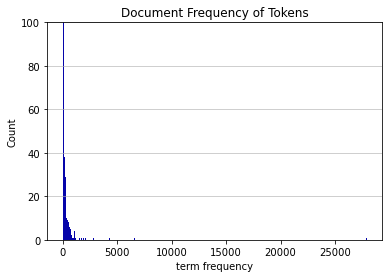

In [37]:
#Plot frequency distribution of tokens
n, bins, patches = plt.hist(x=list(df_dict.values()), bins=500, color="#0504aa")
plt.grid(axis="y", alpha=0.75)
plt.xlabel("term frequency")
plt.ylabel("Count")
plt.title("Document Frequency of Tokens")
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=100)

# Stemming

In [38]:
print('Dictionary length: {}'.format(len(df_dict)))

Dictionary length: 19088


In [39]:
#look at the 20 most common words
df_dict.most_common(20)

[('game', 27912),
 ('good', 8124),
 ('nice', 6593),
 ('best', 5269),
 ('love', 4304),
 ('', 4146),
 ('like', 2813),
 ('play', 2310),
 ('time', 2070),
 ('super', 1933),
 ('awesome', 1865),
 ('coc', 1761),
 ('ever', 1720),
 ('great', 1719),
 ('please', 1514),
 ('supercell', 1414),
 ('world', 1327),
 ('much', 1322),
 ('amazing', 1177),
 ('update', 1121)]

In [235]:
# #create a dictionary without stopwords
# df_dict_wo_stopwords = {}
# for key in df_dict.keys():
#     if key not in all_stopwords:
#         df_dict_wo_stopwords[key] = df_dict[key]

In [236]:
# #Look at length of df_dict_wo_stopwords
# print('Length of document frequency with stopwords removed:  {}'.format(len(df_dict_wo_stopwords)))

Length of document frequency with stopwords removed:  26595


(0.0, 100.0)

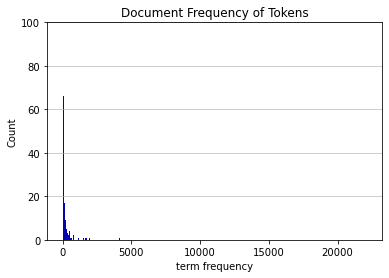

In [237]:
# #Plot frequency distribution of tokens after removing stopwords
# n, bins, patches = plt.hist(x=list(df_dict_wo_stopwords.values()), bins=1000, color="#0504aa")
# plt.grid(axis="y", alpha=0.75)
# plt.xlabel("term frequency")
# plt.ylabel("Count")
# plt.title("Document Frequency of Tokens")
# maxfreq = n.max()
# # Set a clean upper y-axis limit.
# plt.ylim(ymax=100)

In [40]:
#look at format of term frequency
for x in range(5):
    print(tf_dict[x])

Counter({'': 1})
Counter({'pls': 1})
Counter({'make': 1})
Counter({'th13': 1})
Counter({'cute': 1})


In [41]:
# remove tokens which are extremely common or extremely rare
lower_count_thr = 50 # rare words/tokens
upper_count_thr = 5000 # frequent/common tokens
trim_df_dict = Counter(
    {
        token: df_dict[token]
        for token in df_dict
        if lower_count_thr <= df_dict[token] <= upper_count_thr
    }
)
pprint("number of unique tokens after trimming: " + str(len(trim_df_dict)))
pprint("most frequent tokens")
pprint(trim_df_dict.most_common(10))
pprint("least frequent tokens")
pprint(trim_df_dict.most_common()[:-11:-1])


'number of unique tokens after trimming: 443'
'most frequent tokens'
[('love', 4304),
 ('', 4146),
 ('like', 2813),
 ('play', 2310),
 ('time', 2070),
 ('super', 1933),
 ('awesome', 1865),
 ('coc', 1761),
 ('ever', 1720),
 ('great', 1719)]
'least frequent tokens'
[('brain', 50),
 ('event', 50),
 ('look', 50),
 ('resources', 50),
 ('mine', 50),
 ('bast', 50),
 ('theres', 50),
 ('ho', 51),
 ('etc', 51),
 ('wonder', 51)]


In [46]:
# create token to id maps
token_to_id_dict = {
    token: index for index, token in enumerate(trim_df_dict)
}  # http://book.pythontips.com/en/latest/enumerate.html
id_to_token_dict = {index: token for index, token in enumerate(trim_df_dict)}
tf_idf_values = []
N = len(content)
# we are ready to compute tfidf
from math import log


tf_idf_lists = []

ctr = 0
for review_id, review_tokens in enumerate(content):

    # since its not advised to hold full tf-idf dictionary due to limited  RAM, we only compute
    # tf-idf of top 1000 reviews. IN practice the vectors are dumped to storage (a file)
    # line by line
    if ctr > 100:
        break
    ctr += 1
    tf_idf_list = [0] * len(token_to_id_dict)
    for token in review_tokens:
        if token not in token_to_id_dict:
            continue
        token_id = token_to_id_dict[token]
        # TFIDF formula
        if token not in tf_dict[review_id]:
            continue
        tf = tf_dict[review_id][token]
        idf = log(N / df_dict[token], 10)  # log to base 10
        tf_idf = tf * idf
        tf_idf_list[token_id] = tf_idf
        tf_idf_values.append(tf_idf)
    tf_idf_lists.append(tf_idf_list)


In [55]:
# print sample tfidf vector values
review_id =1
tf_idf_vector = [tf_idf_lists[review_id][index] for index in [token_to_id_dict[token] for token in tf_dict[review_id] if token in token_to_id_dict]]
pprint(tf_idf_vector[:10])

[0]
